# 선형회귀 : 보험료 예측
1. 데이터 수집
2. 데이터 전처리
3. 모델 학습
4. 모델 평가
5. 모델 배포

In [1]:
print('선형회귀 예제 시작합니다.')

선형회귀 예제 시작합니다.


In [2]:
import pandas as pd

In [3]:
#@title 데이터 수집
file_name = 'insurance.csv' #@param{'type' : 'string'} 
# 코드가릴때 사용해도 됩니다.
url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/insurance.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info() # Non_Null(결측치)유무 확인 / 데이터타입(머신러닝세계에서 연속, 비연속 판별)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 숫자형 데이터int or float 통계치를 요약해줍니다. (object는 제외)
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
# 판다스의 숫자데이터를 소수점 n자리 까지만 표시(2)
pd.options.display.float_format = '{:.2f}'.format

In [8]:
#@title 데이터 전처리
#@markdown 모델링 하기 좋게 데이터를 정제합니다.
#@markdown 컴퓨터가 알아먹기 좋게 범주형같은 자료를 이진화하는 작업역시 전처리 과정입니다.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# X : 독립변수(들), y : 종속변수(1개)
df.columns
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df.expenses

df.info



<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female 27.90         0    yes  southwest  16884.92
1      18    male 33.80         1     no  southeast   1725.55
2      28    male 33.00         3     no  southeast   4449.46
3      33    male 22.70         0     no  northwest  21984.47
4      32    male 28.90         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male 31.00         3     no  northwest  10600.55
1334   18  female 31.90         0     no  northeast   2205.98
1335   18  female 36.90         0     no  southeast   1629.83
1336   21  female 25.80         0     no  southwest   2007.95
1337   61  female 29.10         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [9]:
# https://www.w3schools.com/python/pandas/default.asp
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
# 흡연자 비흡연자 여부
df.smoker.eq('yes')
# df.smoker == 'yes

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [11]:
# 이것을 수치화 하려면?? 1을 곱해보세요!
# df.smoker.eq('yes') * 1
df.smoker.eq('yes').mul(1)


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [12]:
# replace 안쓰고도 보다쉬운방법으로 접근이 가능합니다.
df.smoker = df.smoker.eq('yes').mul(1)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,0,northwest,10600.55
1334,18,female,31.90,0,0,northeast,2205.98
1335,18,female,36.90,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.95


In [13]:
# 데이터프레임 데이터 타입
print(df.dtypes)

print('-'*50)

# unique는 범주를 봅니다
print(df.sex.unique())
print(df.region.unique())

print('-'*50)

# nunique는 범주의 개수를 봅니다.
print(df.sex.nunique())
print(df.region.nunique())

age           int64
sex          object
bmi         float64
children      int64
smoker        int32
region       object
expenses    float64
dtype: object
--------------------------------------------------
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']
--------------------------------------------------
2
4


In [14]:
# region같이 4개로 된경우는 원-핫으로 데이터 처리를 해봅시다.
pd.get_dummies(df, columns = ['sex', 'region'])

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,0,0,0,0,1
1,18,33.80,1,0,1725.55,0,1,0,0,1,0
2,28,33.00,3,0,4449.46,0,1,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,1,0,0
4,32,28.90,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,0,1,0,1,0,0
1334,18,31.90,0,0,2205.98,1,0,1,0,0,0
1335,18,36.90,0,0,1629.83,1,0,0,0,1,0
1336,21,25.80,0,0,2007.95,1,0,0,0,0,1


In [15]:
# 굳이 여러개로 나뉘어서 보기 힘들어지는 컬럼을 알아서 요약해줍니다.
# 남성 아니면 여성이라 sex 컬럼은 하나는 drop함 
# 노스웨스트, 사우스웨스트, 사우스이스트 아니면 노스이스트니까 하나 drop합니다.
df_dummy = pd.get_dummies(df, columns = ['sex', 'region'], drop_first = True)
df_dummy

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [16]:
#@title Tip : 얕은 복사, 깊은 복사

In [17]:
# 데이터 전처리(훈련셋과 시험셋을 나눔)
# 컴퓨터는 망각하지 않기 때문에 훈련한것으로 테스트를 하면 전부 맞추게 됩니다.
# 그래서 데이터의 일부를 시험셋으로 독립시켜 시험을 진행합니다.

In [18]:
df_dummy.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [19]:
 X = df_dummy[['age', 'bmi', 'children', 'smoker', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest']]
 y = df_dummy.expenses 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# test_size : 비율 -> 테스트셋(시험셋)의 비율
# random_state : seed값 -> 임의로 결정되는 값을 특정 값으로 만들어 줍니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)


In [22]:
#@title 모델 학습
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# 모델 예측
pred = model.predict(X_test)
pred

array([ 4331.00324717,  4432.6328141 ,  8450.52715928,  2822.16030428,
       24753.07616919, 37387.9645111 , 15313.52211485,  3154.31364875,
       29032.53764557, 16312.9316321 , 15415.89974014,  4832.13172529,
       11643.57283308,  4790.42460274,  9297.09717818, 31471.3532247 ,
       11695.63693626, 12761.88669628,  6753.25998799, 18342.61770568,
       14184.9599955 ,  2774.89494426,  6794.12596173, 31841.89150412,
       14079.42121975, 32663.31512284,  7077.8307685 , 40045.45982081,
       31721.0611106 , 13400.29558223, 18396.32361721,  2898.21716743,
       39642.67330363, 26779.18200898,  8358.01024104, 12107.96864408,
        8220.54039614, 33042.51856769,  4519.38567369, 38047.88497047,
        7649.38731392, 13069.84456373,  5366.52112937,  8259.15990877,
        1217.42542823,  5176.53768926,  5329.95733386,  4102.64656509,
        2700.45053065, 11043.72334695, 17292.30729979,  7296.10092488,
        5681.39804262,  8817.43159661,  6966.06306507, 13931.29294217,
      

In [26]:
#@title 모델 평가
comparison = pd.DataFrame(
    {'actual' : y_test, 'pred' : pred}
)
comparison

,actual,pred
12,1826.84,4331.00
306,20177.67,4432.63
318,7421.19,8450.53
815,1877.93,2822.16
157,15518.18,24753.08
...,...,...
713,1984.45,6557.66
1282,14283.46,23649.64
531,14043.48,14879.04
537,8825.09,10021.48


In [27]:
# 위에나온 평가를 하나하나 비교하기는 너무 많기 떄문에 한눈에 경향정도는 보는 시각화단계를 수행합니다.
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='actual', ylabel='pred'>

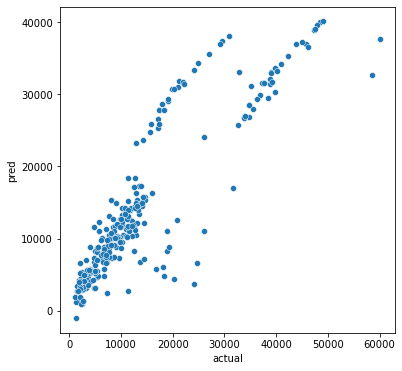

In [28]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

In [29]:
#@title mean_squared_error (평균제곱오차 0에 가까울수록 좋은 모델)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

32193435.2737756

In [30]:
#@title root_mean_squared_error (루트평균제곱오차 0에 가까울수록 좋은 모델)
mean_squared_error(y_test, pred, squared = False)

5673.925913666445

In [31]:
# R^2 : 결정계수 (독립변수가 종속변수를 얼마나 잘 설명하는가)
model.score(X_train, y_train)

0.7380843471816282

In [32]:
model.coef_

array([ 2.63734977e+02,  3.11708591e+02,  4.73100524e+02,  2.34920228e+04,
        1.24570883e+01, -4.03279141e+02, -9.17670058e+02, -1.11644405e+03])

In [33]:
pd.Series(model.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64

In [34]:
model.intercept_

-11353.689780589884

In [35]:
#@title 모델 배포
!pip install mlxtend --quiet

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\rx178\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [36]:
import joblib

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [37]:
model_from_joblib = joblib.load('first_model.pkl')
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64